In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

In [3]:
def load_img():
    img = cv2.imread('/content/drive/MyDrive/dataset/ north_sign.png').astype(np.float32) / 255
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)


In [4]:
img1 = cv2.imread('/content/drive/MyDrive/dataset/north_road.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('/content/drive/MyDrive/dataset/ north_sign.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

print(img1.shape)
print(img2.shape)

(768, 1024, 3)
(300, 400, 3)


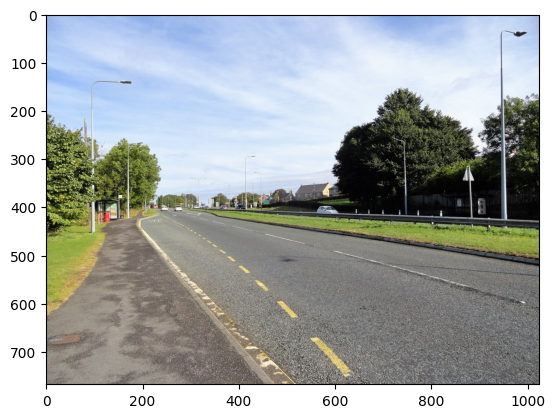

In [5]:
plt.imshow(img1)

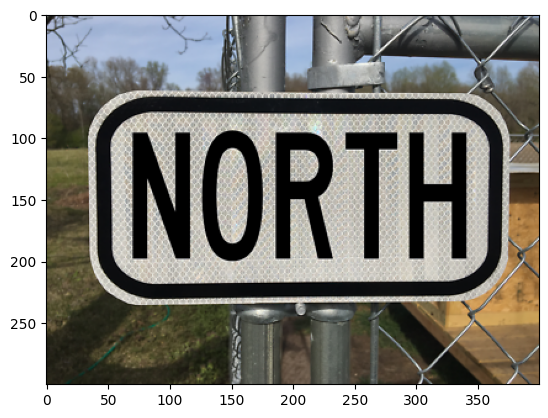

In [6]:
plt.imshow(img2)

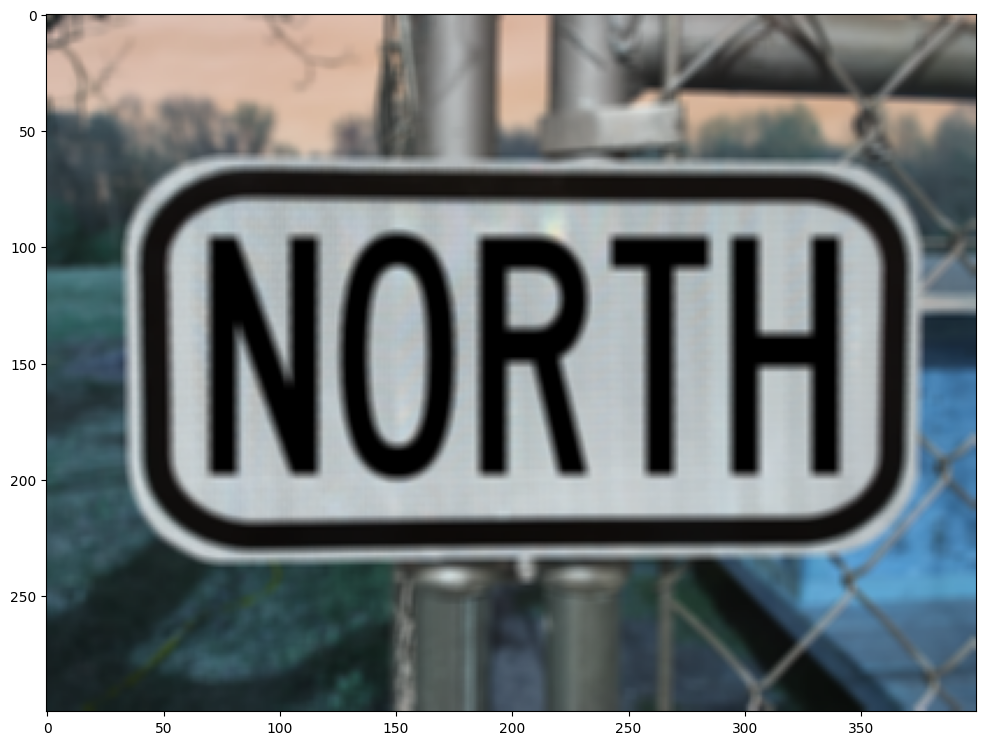

In [20]:
kernel = np.ones(shape=(5,5), dtype=np.float32)/25
blurred = cv2.filter2D(img, -1, kernel)
# blurred = cv2.blur(img, ksize=(5,5))
# blurred = cv2.GaussianBlur(img, (5,5), 10)
# blurred = cv2.medianBlur(img, 5)
display_img(blurred)

In [22]:
#This function displays the image more larger.
def show_pic(img):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="gray")

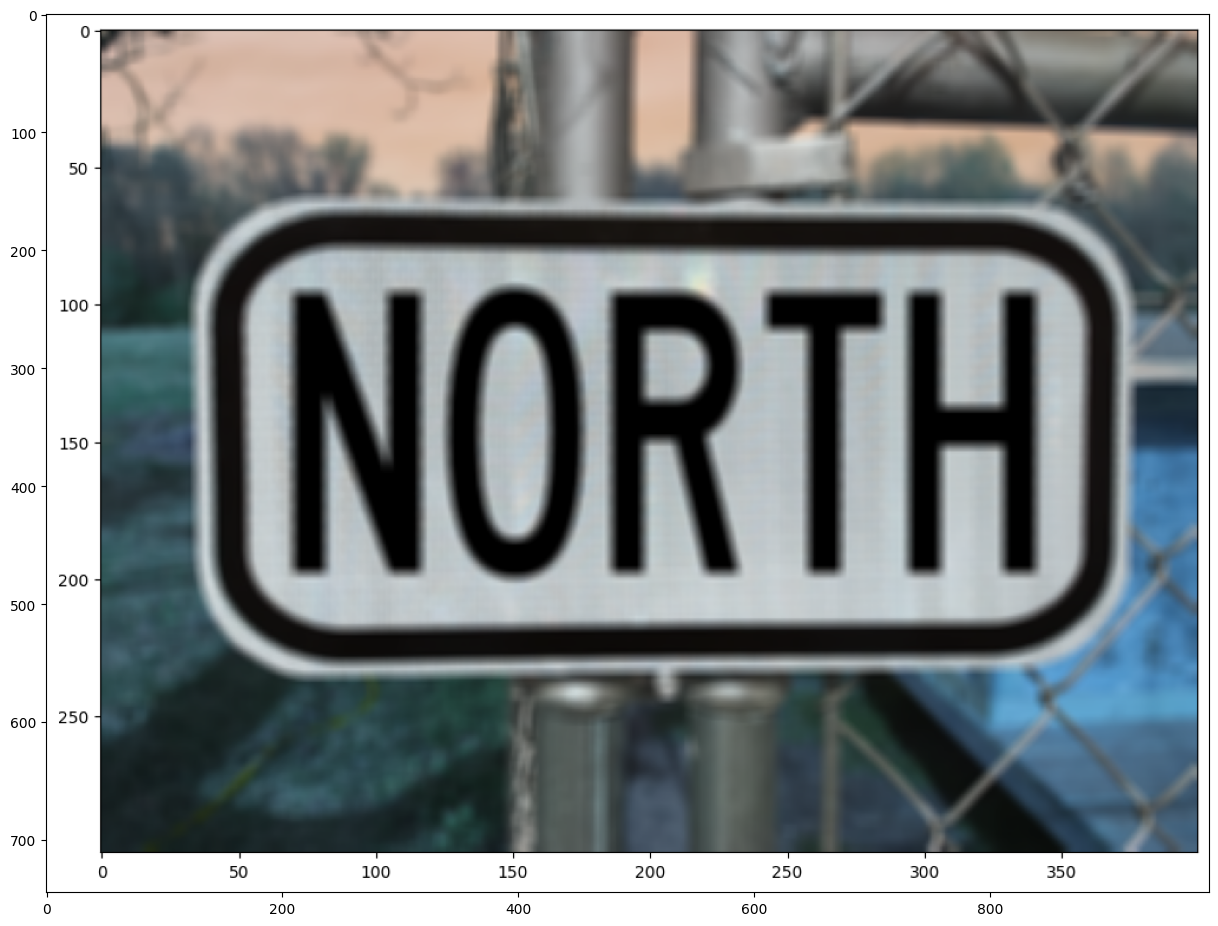

In [26]:
img = cv2.imread('/content/drive/MyDrive/dataset/ha.png', 0) # Adding a value zero means turning the read image to grayscale.
show_pic(img)

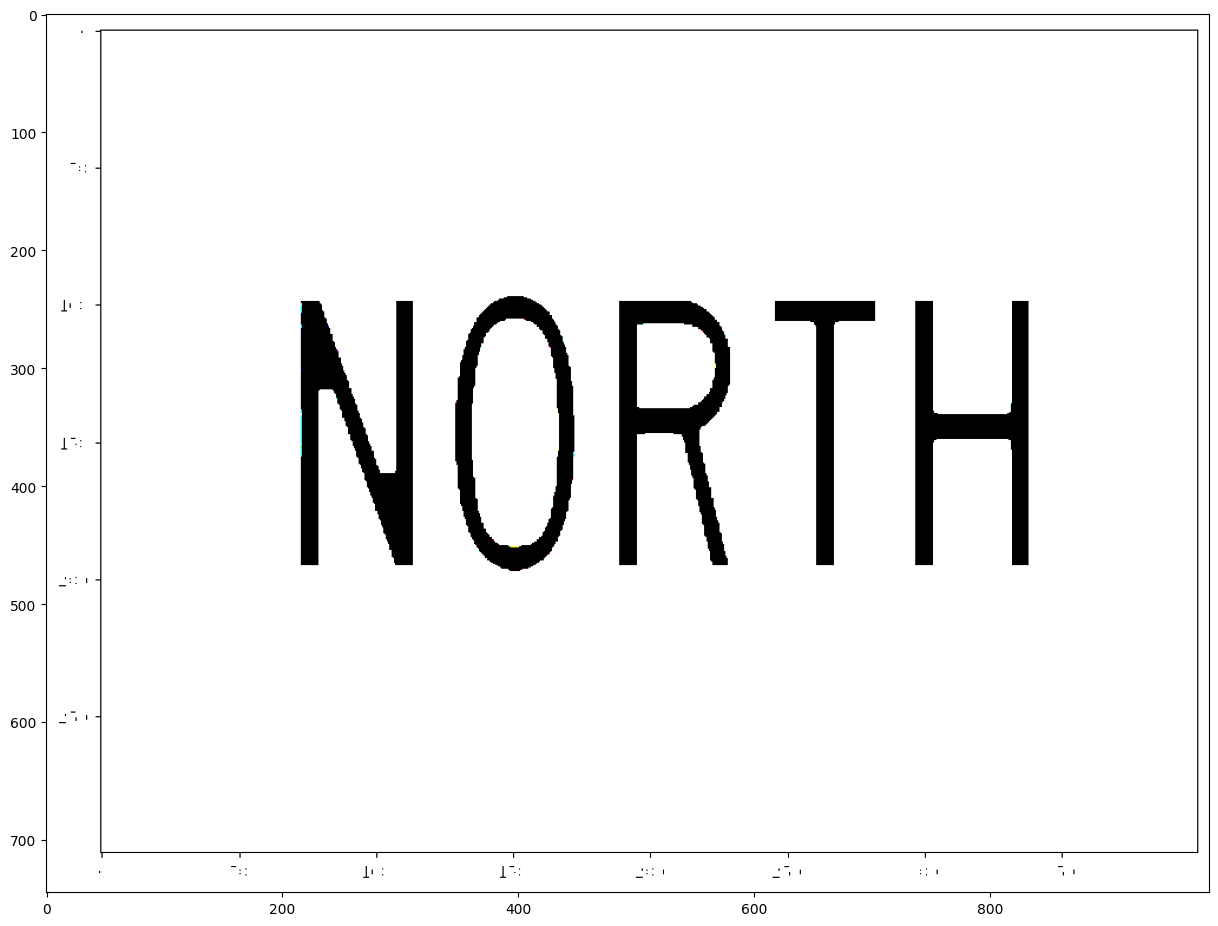

In [27]:
ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)
show_pic(th1)

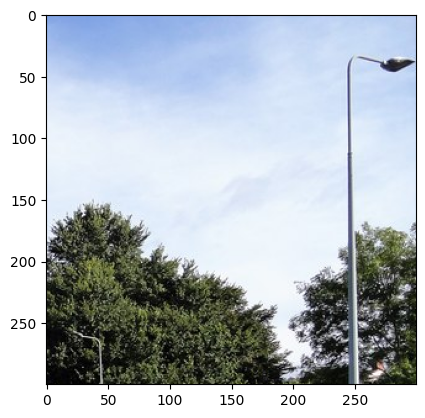

In [28]:
img1 = cv2.imread('/content/drive/MyDrive/dataset/north_road.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('/content/drive/MyDrive/dataset/img1.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

#Resizing the watermark to a smaller one.
img2 = cv2.resize(img2, (300,300))

#Getting the ROI
x_offset = 700
y_offset = 300 - 300
rows,cols,channels = img1.shape
roi = img1[y_offset:300, x_offset:1000]
plt.imshow(roi)

In [29]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

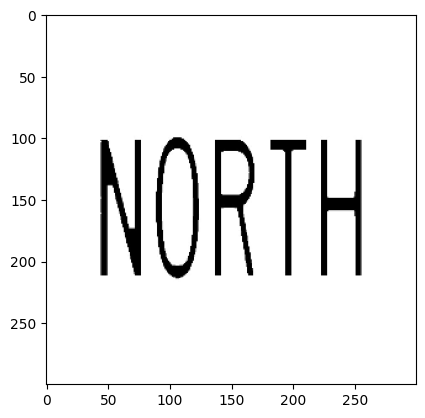

In [30]:
plt.imshow(img2gray, cmap='gray')

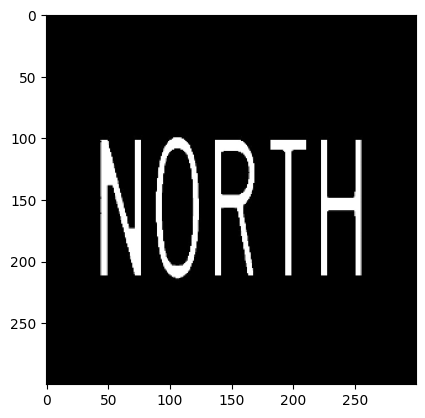

In [31]:
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv, cmap='gray')

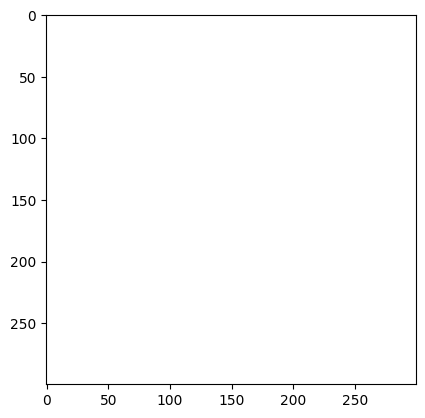

In [32]:
mask_inv.shape #Currently has no channels. So we need to add channels
white_background = np.full(img2.shape, 255, dtype=np.uint8) #create an image with whitebackground and has three channels
white_background.shape
plt.imshow(white_background)

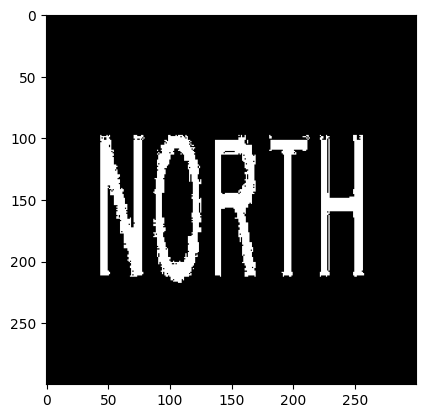

In [33]:
bk = cv2.bitwise_or(white_background, white_background, mask= mask_inv)
bk.shape
plt.imshow(bk)

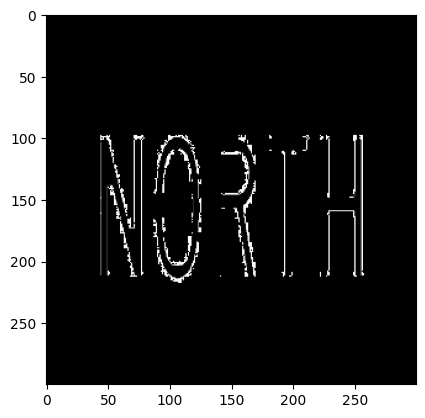

In [34]:
fg = cv2.bitwise_or(img2, img2, mask = mask_inv) # create another image considering the original color of the image but only on the masked area.
plt.imshow(fg)

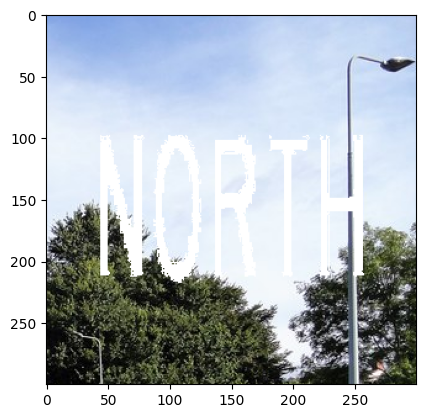

In [35]:
final_roi = cv2.bitwise_or(roi, bk)
plt.imshow(final_roi)

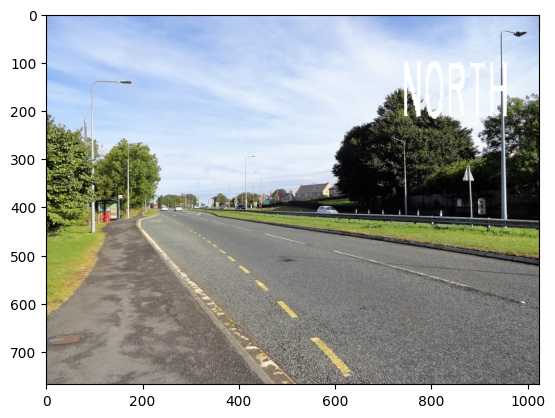

In [36]:
def blend2images(img1, img2):
    large_img = img1.copy()
    small_img = img2
    large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img
    return large_img

# Call the blend2images function to blend the images
result_img = blend2images(img1, final_roi)

# Display the resulting image
plt.imshow(result_img)


In [37]:
large_img = cv2.cvtColor(result_img, cv2.COLOR_RGB2BGR)
cv2.imwrite('/content/drive/MyDrive/dataset/img2.jpg', large_img)

True